In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords
import nltk

df = pd.read_csv('../data/dontpatronizeme_pcl.tsv', sep='\t',
                  header=None,
                  names=['par_id','keyword','country','text','label'],
                  skiprows=4)

df['binary_label'] = df['label'].apply(lambda x: 0 if x < 2 else 1)
print(df.shape)
print(df['binary_label'].value_counts())

(10469, 6)
binary_label
0    9476
1     993
Name: count, dtype: int64


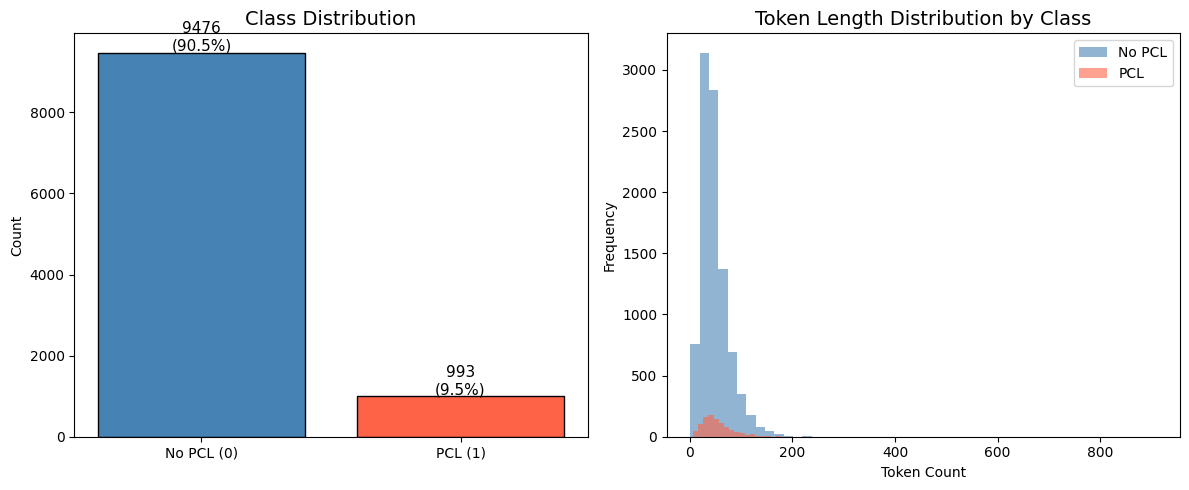

=== Token Count Stats ===
Overall - Mean: 48.6, Max: 910, 95th percentile: 102
PCL     - Mean: 53.8
No PCL  - Mean: 48.1


In [2]:
# --- PART A: Class Distribution Bar Chart ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

label_counts = df['binary_label'].value_counts().sort_index()
axes[0].bar(['No PCL (0)', 'PCL (1)'], label_counts.values, 
            color=['steelblue', 'tomato'], edgecolor='black')
axes[0].set_title('Class Distribution', fontsize=14)
axes[0].set_ylabel('Count')
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 50, f'{v}\n({v/len(df)*100:.1f}%)', 
                 ha='center', fontsize=11)

# --- PART B: Token Length Distribution by Class ---
import nltk
df['token_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))

pcl = df[df['binary_label'] == 1]['token_count']
no_pcl = df[df['binary_label'] == 0]['token_count']

axes[1].hist(no_pcl, bins=50, alpha=0.6, label='No PCL', color='steelblue')
axes[1].hist(pcl, bins=50, alpha=0.6, label='PCL', color='tomato')
axes[1].set_title('Token Length Distribution by Class', fontsize=14)
axes[1].set_xlabel('Token Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.savefig('eda_technique1.png', dpi=150)
plt.show()

# Print summary stats
print("=== Token Count Stats ===")
print(f"Overall - Mean: {df['token_count'].mean():.1f}, "
      f"Max: {df['token_count'].max()}, "
      f"95th percentile: {df['token_count'].quantile(0.95):.0f}")
print(f"PCL     - Mean: {pcl.mean():.1f}")
print(f"No PCL  - Mean: {no_pcl.mean():.1f}")

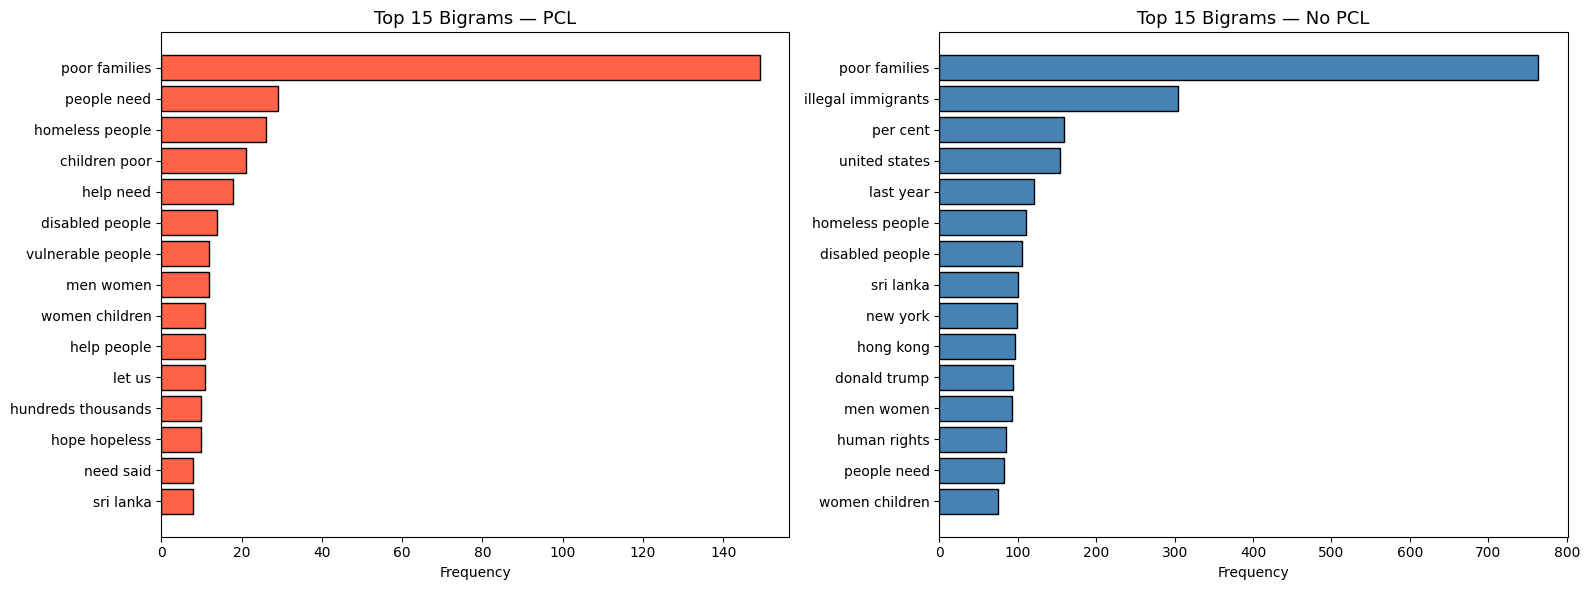

In [3]:
# --- PART C: N-gram Analysis by Class ---
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def get_top_ngrams(texts, n=2, top_k=20):
    all_ngrams = []
    for text in texts:
        tokens = nltk.word_tokenize(str(text).lower())
        tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
        all_ngrams.extend(list(ngrams(tokens, n)))
    return Counter(all_ngrams).most_common(top_k)

pcl_texts = df[df['binary_label'] == 1]['text']
no_pcl_texts = df[df['binary_label'] == 0]['text']

pcl_bigrams = get_top_ngrams(pcl_texts, n=2, top_k=15)
no_pcl_bigrams = get_top_ngrams(no_pcl_texts, n=2, top_k=15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCL bigrams
labels, counts = zip(*pcl_bigrams)
labels = [' '.join(l) for l in labels]
axes[0].barh(labels[::-1], counts[::-1], color='tomato', edgecolor='black')
axes[0].set_title('Top 15 Bigrams — PCL', fontsize=13)
axes[0].set_xlabel('Frequency')

# No PCL bigrams
labels2, counts2 = zip(*no_pcl_bigrams)
labels2 = [' '.join(l) for l in labels2]
axes[1].barh(labels2[::-1], counts2[::-1], color='steelblue', edgecolor='black')
axes[1].set_title('Top 15 Bigrams — No PCL', fontsize=13)
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.savefig('eda_technique2.png', dpi=150)
plt.show()